- **Purpose:** Understand SVM by applying it to one example
- **Data:** Iris dataset
- **Author:** Emily Diaz
- **Date:** May 29th, 2022 

### Support Vector Machines (SVM)

The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

- SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. 
- It is known for its kernel trick to **handle nonlinear input spaces**. 
- It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.
- Generally, SVM is considered to be a classification approach, it but can be used on regression problems
- It can easily handle multiple continuous and categorical variables
- The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

3 Important concepts on SVM: 

**Support Vectors:** data points which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane:** decision plane which separates between a set of objects having different class memberships.

**Margin:** gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

<img src="img/svm2.png"/>

#### Dealing with non-linear and inseparable planes

Some problems can’t be solved using linear hyperplane. In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space where we can easily segregate the points using linear separation. It basically converts nonseparable problem to separable problems by adding more dimension to it.

The SVM algorithm is implemented in practice using a kernel:
- Linear Kernel
- Polynomial Lernel
- Radial Basis Function Kernel

#### Advantages: 

SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

#### Disadvantages:

SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.


# Libraries

In [30]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# Load Data

In [18]:
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

# Prepare dataset

In [19]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model

In [20]:
# Initiate model
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train it
clf.fit(X_train, y_train)


/Users/natashadiaz/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Model evaluation

In [21]:
# Predict train
y_pred_train = clf.predict(X_train)

# Predict test
y_pred_test = clf.predict(X_test)

In [25]:
# Accuracy score on test
print("Train set accuracy: ", accuracy_score(y_train, y_pred_train, normalize=True))
print("Test set accuracy: ", accuracy_score(y_test, y_pred_test, normalize=True))

Train set accuracy:  0.9714285714285714
Test set accuracy:  1.0


In [29]:
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Variable importance

Only possible as this is a linear kernel

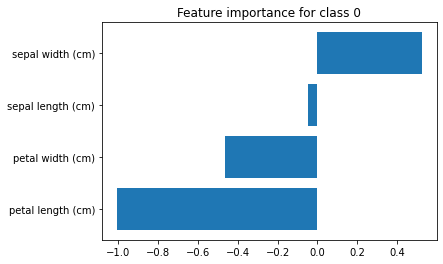

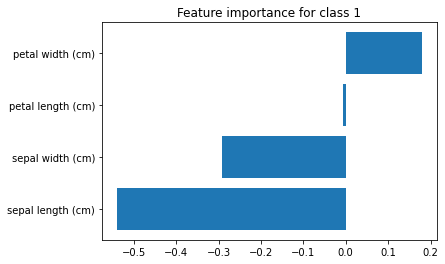

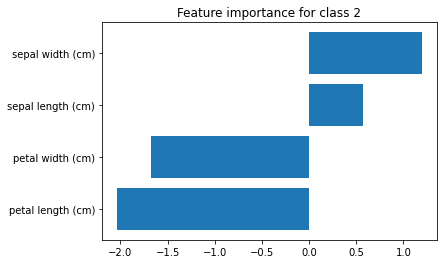

In [51]:
def f_importances(coef, names):
    for class_n in range(clf.coef_.shape[0]):
        imp = coef[class_n]
        imp,names = zip(*sorted(zip(imp,names)))
        plt.barh(range(len(names)), imp, align='center')
        plt.yticks(range(len(names)), names)
        plt.title("Feature importance for class " + str(class_n))
        plt.show()

f_importances(clf.coef_, iris.feature_names[:]) 

Missing hyperparameter tuning: 
- Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
- Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
- Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.


Fix var importance

Sources used for creating this notebook: 
- https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python